In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('airquality.csv')

In [3]:
df.sample(10)

,Unnamed: 0,Ozone,Solar.R,Wind,Temp,Month,Day,Humidity
95,96,78.0,NaN,6.9,86,8,4,NaN
144,145,23.0,14.0,9.2,71,9,22,NaN
62,63,49.0,248.0,9.2,85,7,2,NaN
138,139,46.0,237.0,6.9,78,9,16,NaN
57,58,NaN,47.0,10.3,73,6,27,medium
135,136,28.0,238.0,6.3,77,9,13,NaN
79,80,79.0,187.0,5.1,87,7,19,NaN
150,151,14.0,191.0,14.3,75,9,28,low
55,56,NaN,135.0,8.0,75,6,25,high
66,67,40.0,314.0,10.9,83,7,6,NaN


In [4]:
# cleanig data

In [5]:
df = df.drop(columns='Unnamed: 0')
df

,Ozone,Solar.R,Wind,Temp,Month,Day,Humidity
0,41.0,190.0,7.4,67,5,1,high
1,36.0,118.0,8.0,72,5,2,medium
2,12.0,149.0,12.6,74,5,3,low
3,18.0,313.0,11.5,62,5,4,medium
4,NaN,NaN,14.3,56,5,5,low
...,...,...,...,...,...,...,...
148,30.0,193.0,6.9,70,9,26,low
149,NaN,145.0,13.2,77,9,27,NaN
150,14.0,191.0,14.3,75,9,28,low
151,18.0,131.0,8.0,76,9,29,NaN


In [6]:
# checking null value is present or not

In [7]:
df.isnull().sum()

Ozone       37
Solar.R      7
Wind         0
Temp         0
Month        0
Day          0
Humidity    72
dtype: int64

In [8]:
# filling the null values

In [9]:
df['Ozone'] = df['Ozone'].fillna(df['Ozone'].mean())

In [10]:
df['Solar.R'] = df['Solar.R'].fillna(df['Solar.R'].mean())

In [11]:
df['Humidity'] = df['Humidity'].fillna(df['Humidity'].mode()[0])

# Since mode() returns a Series, we select the first element ([0]) from the Series,
# which corresponds to the first mode value. This ensures that we get a single value 
# to fill in for missing values.

In [12]:
df.isnull().sum()

Ozone       0
Solar.R     0
Wind        0
Temp        0
Month       0
Day         0
Humidity    0
dtype: int64

In [13]:
from sklearn import preprocessing

In [14]:
df['Humidity'].unique()

array(['high', 'medium', 'low', ' '], dtype=object)

In [15]:
labelEncoding = preprocessing.LabelEncoder()

In [16]:
df['Humidity'] = labelEncoding.fit_transform(df['Humidity'])

In [17]:
df.head()

,Ozone,Solar.R,Wind,Temp,Month,Day,Humidity
0,41.00000,190.000000,7.4,67,5,1,1
1,36.00000,118.000000,8.0,72,5,2,3
2,12.00000,149.000000,12.6,74,5,3,2
3,18.00000,313.000000,11.5,62,5,4,3
4,42.12931,185.931507,14.3,56,5,5,2


In [18]:
labelEncoding.classes_

array([' ', 'high', 'low', 'medium'], dtype=object)

In [19]:
labelEncoding.transform(labelEncoding.classes_)

array([0, 1, 2, 3])

In [20]:
# # Perform one-hot encoding

# from sklearn.preprocessing import OneHotEncoder

# df['Humidity'] = df['Humidity'].astype('category')
# df['Humidity'] = df['Humidity'].cat.codes

# one_hot_encoder = OneHotEncoder(sparse=False)
# enc_data = one_hot_encoder.fit_transform(df[['Humidity']])

# # Convert encoded data into DataFrame
# enc_df = pd.DataFrame(enc_data, columns=['high', 'low', 'medium'])

# new_df = df.join(enc_df)

# print(new_df)

In [21]:
# data Intergration

In [22]:
subset1 = df[['Temp', 'Ozone']]
subset2 = df[['Temp', 'Solar.R']]

In [23]:
merged_df = pd.concat([subset1, subset2.drop('Temp', axis=1)], axis=1)
merged_df

,Temp,Ozone,Solar.R
0,67,41.00000,190.000000
1,72,36.00000,118.000000
2,74,12.00000,149.000000
3,62,18.00000,313.000000
4,56,42.12931,185.931507
...,...,...,...
148,70,30.00000,193.000000
149,77,42.12931,145.000000
150,75,14.00000,191.000000
151,76,18.00000,131.000000


In [24]:
df.corr()

,Ozone,Solar.R,Wind,Temp,Month,Day,Humidity
Ozone,1.000000,0.302970,-0.530936,0.608742,0.149081,-0.011355,0.011795
Solar.R,0.302970,1.000000,-0.055245,0.262569,-0.072904,-0.145621,-0.080413
Wind,-0.530936,-0.055245,1.000000,-0.457988,-0.178293,0.027181,-0.069669
Temp,0.608742,0.262569,-0.457988,1.000000,0.420947,-0.130593,-0.055810
Month,0.149081,-0.072904,-0.178293,0.420947,1.000000,-0.007962,0.030081
Day,-0.011355,-0.145621,0.027181,-0.130593,-0.007962,1.000000,0.041924
Humidity,0.011795,-0.080413,-0.069669,-0.055810,0.030081,0.041924,1.000000


In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

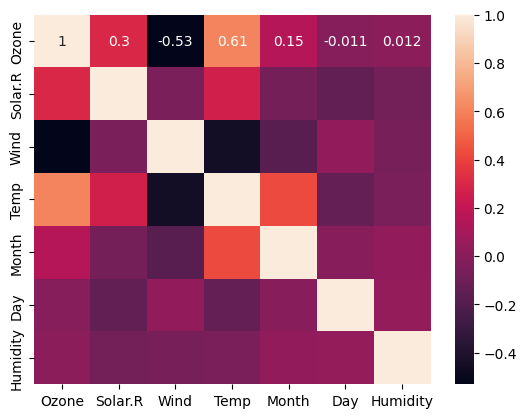

In [26]:
sns.heatmap(df.corr(), annot=True)
plt.show()


In [27]:
# data splitting

In [28]:

from sklearn.model_selection import train_test_split
x = df[['Ozone']]
y = df[['Temp']]
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.25)

In [29]:
# model buliding

In [30]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(xtrain,ytrain)

LinearRegression()

In [31]:
model.coef_

array([[0.19180908]])

In [32]:
model.intercept_

array([70.08723896])

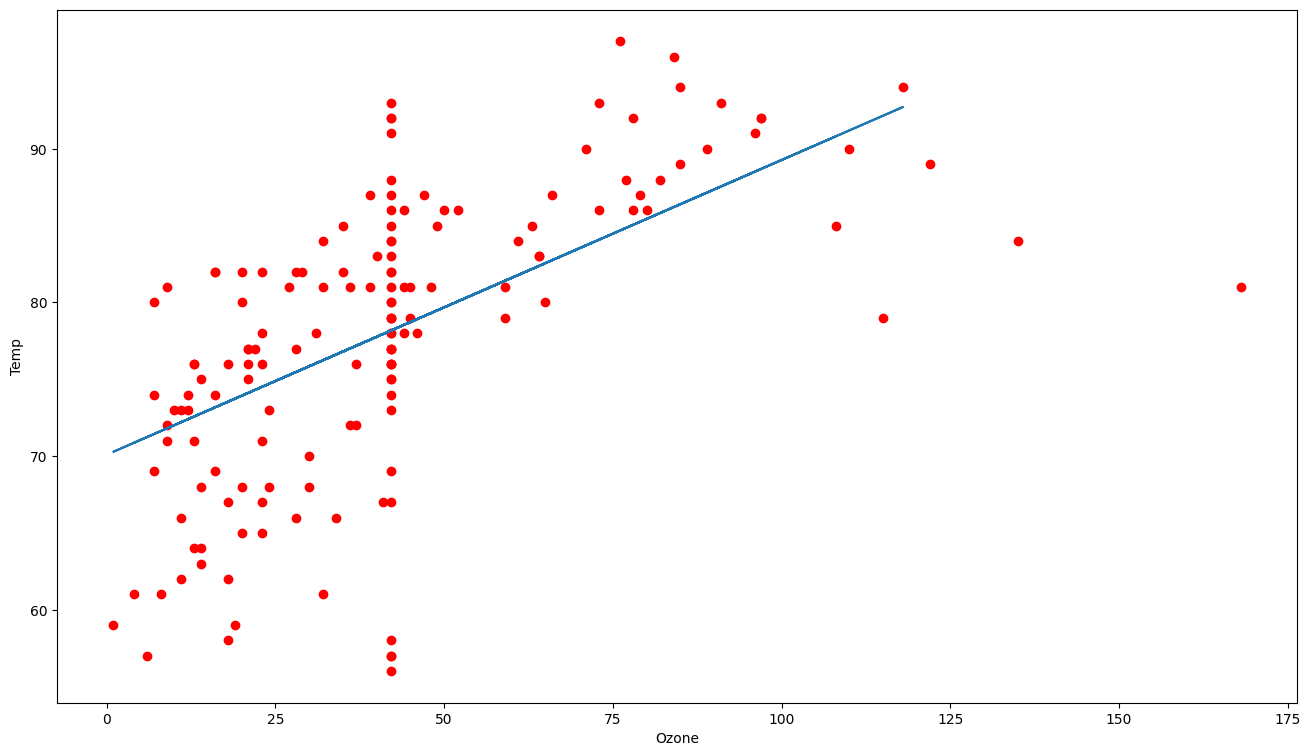

In [33]:
predict = model.predict(xtest)

plt.figure(figsize=(16,9))
plt.plot(xtest,predict)
plt.scatter(df['Ozone'], df['Temp'],  color='red')
plt.xlabel('Ozone')
plt.ylabel('Temp')

plt.show()

In [35]:
from sklearn.metrics import mean_squared_error

In [37]:
mse = mean_squared_error

In [38]:
mse(ytest,predict)

53.971918524417795